### 목차는 아래와 같습니다.
### 1. 콜백 함수, 모델 정의, overfitting, dropout 코드
### 2. validation data를 지정하는 2가지 방법
### 3. 모델 저장, 로드, 복원의 방법
### 4. 이미지 데이터 subplot에 그리기


##1. 콜백 함수와 모델 정의, overfitting, dropout에 대해 살펴보겠습니다.
모델이 학습이 잘 된 경우뿐만 아니라,

callback 함수를 왜 사용하는지를 알아보기 위해 특정 데이터에만 학습이 잘 수행되는, overfitting이 발생한 코드를 살펴보고

그 다음에는

overfitting을 예방하기 위해 dropout을 사용한 코드까지 살펴보겠습니다.

첫 번째로, 학습이 잘 된 경우입니다.

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 8)                 6280      
                                                                 
 dense_17 (Dense)            (None, 10)                90        
                                                                 
Total params: 6370 (24.88 KB)
Trainable params: 6370 (24.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.8228 - accuracy: 0.7231 - val_loss: 0.5681 - val_accuracy: 0.8049
Epoch 2/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.5263 - accuracy: 0.8178 - val_loss: 0.5031 - val_accuracy: 0.8260
Epoch 3/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.4913 - accuracy: 0.8276 - val_loss: 0.4929 - val_a

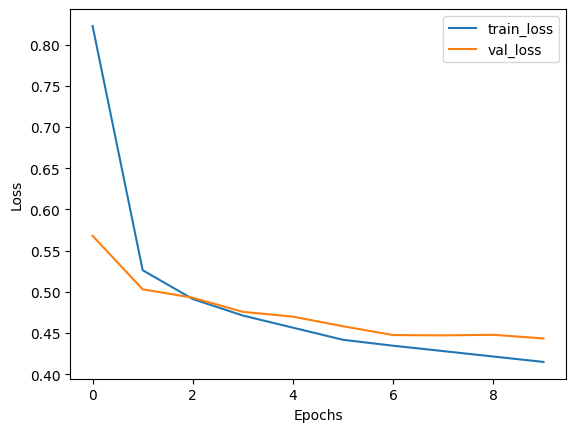

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# 데이터 전처리
X_train = X_train.reshape(-1, 28*28) / 255.0
X_test = X_test.reshape(-1, 28*28) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 모델 정의
model = Sequential([
    Dense(8, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# EarlyStopping 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# 모델 학습
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping, checkpoint])

# 학습 결과 시각화
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


위 코드에서는
케라스 모델을 만드는 방법으로 Sequential 모델을 사용하였습니다. 첫 번째 layer에 input shape을 지정해주는 것이 일반적입니다.

데이터셋은 mnist을 사용하였습니다.

모델의 구조를 변경하면서 코드를 실행했을 때 알게 된 결과는, 만약에 학습할 파라미터 수가 너무 많으면, 오히려 val_loss 값이 일정하게 떨어지지 않고 특정 지점에서부터는 값이 들쑥날쑥한 것으로 결과가 나타납니다.
##하지만 이는 특정 데이터에만 학습이 잘 수행되는 데이터셋의 특성이 영향을 준 것일수도 있습니다.

오히려 파라미터 수가 적절하게 있어야 EarlyStopping이 발생하지 않고 학습이 잘 수행되게 됩니다.
값이 일정하게 떨어지므로 EarlyStopping이 발생하지 않았습니다.


모델 정의에는 함수형 API를 사용하는 방법도 있습니다.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_21 (Dense)            (None, 16)                12560     
                                                                 
 dense_22 (Dense)            (None, 16)                272       
                                                                 
 dense_23 (Dense)            (None, 16)                272       
                                                                 
 dense_24 (Dense)            (None, 10)                170       
                                                                 
Total params: 13274 (51.85 KB)
Trainable params: 13274 (51.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1500/1500 [===

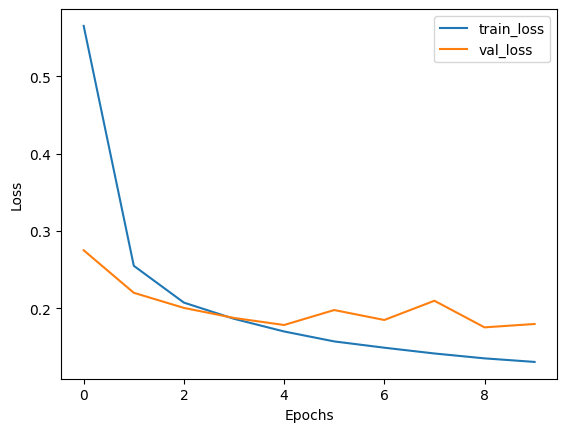

313/313 [==============================] - 1s 2ms/step - loss: 0.1938 - accuracy: 0.9427
Test Loss: 0.19376060366630554, Test Accuracy: 0.9427000284194946


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense
from keras.utils import to_categorical

# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 데이터 전처리
X_train = X_train.reshape(-1, 28*28) / 255.0
X_test = X_test.reshape(-1, 28*28) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 입력 레이어 정의
input_layer = Input(shape=(784,))

# 은닉 레이어 정의
hidden_layer1 = Dense(16, activation='relu')(input_layer)
hidden_layer2 = Dense(16, activation='relu')(hidden_layer1)
hidden_layer3 = Dense(16, activation='relu')(hidden_layer2)

# 출력 레이어 정의
output_layer = Dense(10, activation='softmax')(hidden_layer3)

# 모델 정의
model = Model(inputs=input_layer, outputs=output_layer)

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약 출력
model.summary()

# 모델 학습
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# 학습 결과 시각화
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


학습할 파라메터 수 계산하기

(bias 1 + 28 x 28) x 16 = ( 1 + 784 ) x 16 = 12560

(bias 1 + 16) x 16 = 272

(bias 1 + 16) x 16 = 272

(bias 1 + 16) x 10 = 170

2번째로, callback 함수를 왜 사용하는지를 알아보기 위해
EarlyStopping이 발생하는 코드를 살펴보겠습니다.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 53706 (209.79 KB)
Trainable params: 53706 (209.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3466 - accuracy: 0.8964 - val_loss: 0.1736 - val_accuracy: 0.9495
Epo

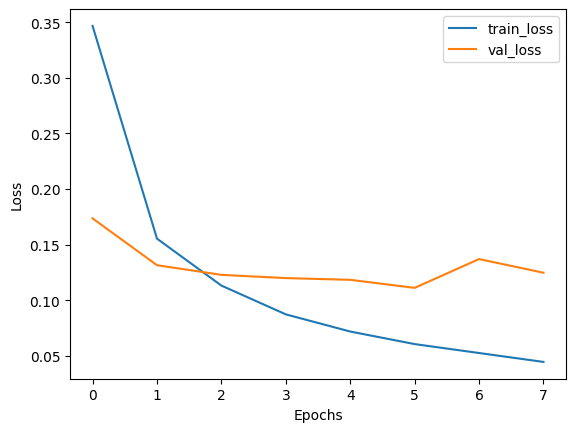

313/313 [==============================] - 1s 2ms/step - loss: 0.1203 - accuracy: 0.9671
Test Loss: 0.12033390253782272, Test Accuracy: 0.9671000242233276


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical

# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 데이터 전처리
X_train = X_train.reshape(-1, 28*28) / 255.0
X_test = X_test.reshape(-1, 28*28) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 모델 정의
model = Sequential([
    Dense(64, input_shape=(784,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# 콜백 함수 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# 모델 학습
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping,checkpoint])

# 학습 결과 시각화
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


6번째 에폭에서의 val_loss 값보다 7,8번째 에폭에서의 val_loss 값이 더 크므로 8번째 에폭 이후 EarlyStopping이 발생하였습니다. 이처럼 값이 더이상 줄어들지 않을 때에는 이후의 학습에서도 loss가 유의미하게 줄어들 것으로 기대되지 않기 때문에 더이상 에폭을 진행할 필요가 없습니다. 즉, 학습을 더이상 진행할 필요가 거의 없습니다. 따라서 학습을 중단 및 종료하게 됩니다. 이것이 바로 callback 함수를 사용하는 이유입니다.

callback 함수를 사용하는 또다른 이유는, 학습 진행 도중에 특정 데이터에만 학습이 잘 수행되는 overfitting이 발생하였기 때문이기도 합니다.

위와 같이 overfitting이 발생하여 EarlyStopping이 발생하기도 합니다. 과적합은 특정 데이터에만 최적화된 새로운 데이터가 입력된 경우에는 학습을 잘 수행하지 못하는 문제입니다.

3번째로, overfitting을 방지하기 위해 dropout을 사용한 경우입니다.

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 256)               200960    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 256)               65792     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_20 (Dense)            (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1200/12

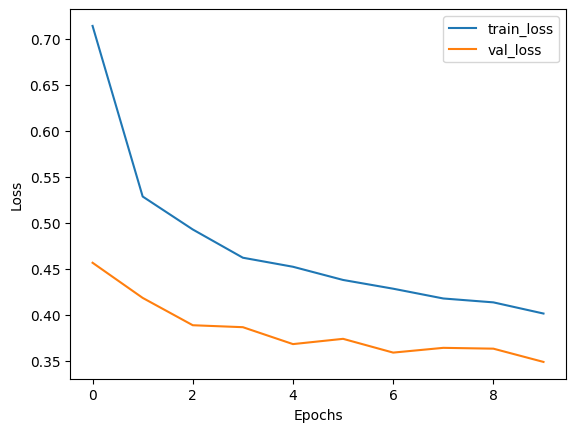

313/313 [==============================] - 1s 3ms/step - loss: 0.3803 - accuracy: 0.8611
Test Loss: 0.38034963607788086, Test Accuracy: 0.8611000180244446


In [ ]:
from keras.layers import Dropout

# 모델 정의
model_dropout = Sequential([
    Dense(256, input_shape=(784,), activation='relu'),
    Dropout(0.5),  # 드롭아웃 추가
    Dense(256, activation='relu'),
    Dropout(0.5),  # 드롭아웃 추가
    Dense(10, activation='softmax')
])
model_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_dropout.summary()

# 콜백 함수 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# 모델 학습
history_dropout = model_dropout.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# 학습 결과 시각화
plt.plot(history_dropout.history['loss'], label='train_loss')
plt.plot(history_dropout.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 모델 평가
loss_dropout, accuracy_dropout = model_dropout.evaluate(X_test, y_test)
print(f'Test Loss: {loss_dropout}, Test Accuracy: {accuracy_dropout}')


##2. 학습할 때 validation data를 지정하는 2가지 방법

첫번째 방법은 fit() 호출 시 검증 데이터를 직접 전달

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# MNIST 데이터셋 로드
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 데이터 전처리
X_train = X_train.reshape((X_train.shape[0], -1)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], -1)).astype('float32') / 255

# 검증 데이터 분리
X_train, X_val = X_train[:-5000], X_train[-5000:]
y_train, y_val = y_train[:-5000], y_train[-5000:]

# 모델 생성
model = Sequential([
    Dense(8, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 첫 번째 방법: fit() 호출 시 검증 데이터 전달
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

# 성능 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
860/860 [==============================] - 14s 14ms/step - loss: 0.7504 - accuracy: 0.7852 - val_loss: 0.3370 - val_accuracy: 0.9048
Epoch 2/5
860/860 [==============================] - 9s 10ms/step - loss: 0.3848 - accuracy: 0.8907 - val_loss: 0.2911 - val_accuracy: 0.9162
Epoch 3/5
860/860 [==============================] - 5s 6ms/step - loss: 0.3462 - accuracy: 0.9012 - val_loss: 0.2675 - val_accuracy: 0.9230
Epoch 4/5
860/860 [==============================] - 9s 10ms/step - loss: 0.3257 - accuracy: 0.9065 - val_loss: 0.2598 - val_accuracy: 0.9268
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.3045 - accuracy: 0.9142
Test accuracy: 0.9142000079154968


두번째 방법은 학습 데이터의 일부를 활용하도록 지정

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# MNIST 데이터셋 로드
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 데이터 전처리
X_train = X_train.reshape((X_train.shape[0], -1)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], -1)).astype('float32') / 255

# 검증 데이터 분리
X_train, X_val = X_train[:-5000], X_train[-5000:]
y_train, y_val = y_train[:-5000], y_train[-5000:]

# 모델 생성
model = Sequential([
    Dense(8, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 두 번째 방법: 학습 데이터의 일부를 활용하여 검증 데이터 지정
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# 성능 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/5
774/774 [==============================] - 3s 3ms/step - loss: 0.7714 - accuracy: 0.7787 - val_loss: 0.4717 - val_accuracy: 0.8685
Epoch 2/5
774/774 [==============================] - 2s 2ms/step - loss: 0.3948 - accuracy: 0.8894 - val_loss: 0.3955 - val_accuracy: 0.8918
Epoch 3/5
774/774 [==============================] - 2s 2ms/step - loss: 0.3468 - accuracy: 0.9017 - val_loss: 0.3715 - val_accuracy: 0.8962
Epoch 4/5
774/774 [==============================] - 2s 2ms/step - loss: 0.3253 - accuracy: 0.9071 - val_loss: 0.3514 - val_accuracy: 0.9009
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3084 - accuracy: 0.9145
Test accuracy: 0.9144999980926514


validation split이 0.1이면 뒤쪽 10% 데이터를 분리하여 검증 데이터로 활용하겠다는 의미입니다.

##3. 모델 저장, 로드, 복원의 방법

##3.1 checkpoint를 사용하여 모델을 저장하는 방법
##**저장한 모델을 로드하여 새롭게 만든 모델의 학습에 이용하는 방법입니다.**

순서 1. 설정

설치와 임포트

필요한 라이브러리를 설치

텐서플로를 임포트

In [3]:
pip install pyyaml h5py  # Required to save models in HDF5 format

In [4]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.15.0


모델 저장과 복원 관련 코드의 시작

순서 2. 예제 데이터셋 받기

MNIST 데이터셋으로 모델을 훈련하여 가중치를 저장하는 예제입니다.

In [5]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.0
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.0

순서 3. 모델 정의

In [9]:
# Define a simple sequential model
def create_model():
  model = tf.keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10)
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

  return model

# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##훈련하는 동안 체크포인트 저장하기

훈련된 모델을 다시 훈련할 필요 없이 사용하거나 훈련 과정이 중단된 경우 중단한 부분에서 훈련을 다시 시작할 수 있습니다. tf.keras.callbacks.ModelCheckpoint 콜백을 사용하면 훈련 도중 또는 훈련 종료 시 모델을 지속적으로 저장할 수 있습니다.

##**순서 4. 체크포인트 콜백 사용하기**

In [7]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
model.fit(train_images,
          train_labels,
          epochs=10,
          validation_data=(test_images, test_labels),
          callbacks=[cp_callback])  # Pass callback to training

# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.

Epoch 1/10
31/32 [============================>.] - ETA: 0s - loss: 1.1464 - sparse_categorical_accuracy: 0.6804
Epoch 1: saving model to training_1/cp.ckpt
32/32 [==============================] - 2s 33ms/step - loss: 1.1449 - sparse_categorical_accuracy: 0.6810 - val_loss: 0.7094 - val_sparse_categorical_accuracy: 0.7880
Epoch 2/10
26/32 [=======================>......] - ETA: 0s - loss: 0.4337 - sparse_categorical_accuracy: 0.8762
Epoch 2: saving model to training_1/cp.ckpt
32/32 [==============================] - 0s 15ms/step - loss: 0.4192 - sparse_categorical_accuracy: 0.8810 - val_loss: 0.5476 - val_sparse_categorical_accuracy: 0.8320
Epoch 3/10
29/32 [==========================>...] - ETA: 0s - loss: 0.2821 - sparse_categorical_accuracy: 0.9321
Epoch 3: saving model to training_1/cp.ckpt
32/32 [==============================] - 0s 12ms/step - loss: 0.2832 - sparse_categorical_accuracy: 0.9310 - val_loss: 0.5005 - val_sparse_categorical_accuracy: 0.8470
Epoch 4/10
30/32 [=======

이처럼 이 코드는 텐서플로 체크포인트 파일을 만들고 에폭이 종료될 때마다 업데이트합니다.(매 에폭마다 지정된 경로에 모델을 저장)



In [8]:
os.listdir(checkpoint_dir)

['cp.ckpt.data-00000-of-00001', 'checkpoint', 'cp.ckpt.index']

##순서 5. 테스트를 위해 모델을 재설정하고 최신 체크포인트를 로드합니다.


In [10]:
# Create a basic model instance
model = create_model()

# Evaluate the model
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

32/32 - 0s - loss: 2.4087 - sparse_categorical_accuracy: 0.0840 - 387ms/epoch - 12ms/step
Untrained model, accuracy:  8.40%


새로운 모델을 만들어서 이 모델에 저장된 모델의 학습 결과를 로드하는 것입니다.

##체크포인트에서 가중치를 로드하고 다시 평가해 보기

In [11]:
# Loads the weights
model.load_weights(checkpoint_path)

# Re-evaluate the model
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

32/32 - 0s - loss: 0.3993 - sparse_categorical_accuracy: 0.8720 - 145ms/epoch - 5ms/step
Restored model, accuracy: 87.20%


앞선 코드의 결과로는 학습되지 않은 모델이 나왔습니다. 즉, 정확도가 낮고 손실이 높은 모델이었습니다.

그러나 이 코드에서는

체크포인트에서 가중치를 로드하고 모델을 다시 평가해보니 정확도가 많이 올라갔고 손실도 많이 줄어들었습니다.

이처럼 저장된 모델을 통해 별도의 모델을 복원할 수 있습니다.

학습 결과가 저장된 모델을 불러온다는 것은 무슨 의미일까요?
##**어떤 모델에서 학습된 가중치를 로드한다는 것은 학습된 파라미터 값들을 로드한다는 것을 의미하므로, 정확도가 높아지고 손실이 줄어드는 것이 당연한 결과입니다.**

##**즉 이미 체크포인트에 저장된 가중치를 로드한다는 것은 이미 학습 결과가 저장되어 있는 모델을 로드한다는 의미이며, 이 저장되어 있는 모델의 파라미터들은 이미 최적의 값들입니다.**

수동으로 가중치 저장하기

가중치를 수동으로 저장하려면 tf.keras.Model.save_weights를 사용합니다. 기본적으로 tf.keras, 그리고 특히 Model.save_weights 메서드는 .ckpt 확장자가 있는 TensorFlow 체크포인트 형식을 사용합니다.

In [16]:
# Save the weights
model.save_weights('./checkpoints/my_checkpoint')

# Create a new model instance
model = create_model()

# Restore the weights
model.load_weights('./checkpoints/my_checkpoint')

# Evaluate the model
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

32/32 - 1s - loss: 0.4706 - sparse_categorical_accuracy: 0.8760 - 873ms/epoch - 27ms/step
Restored model, accuracy: 87.60%


##3-2. checkpoint를 사용하지 않고 모델을 저장하는 방법

(1)전체 모델 저장하기

In [17]:
# Create and train a new model instance.
model = create_model()
model.fit(train_images, train_labels, epochs=5)

# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model')

Epoch 1/5
32/32 [==============================] - 1s 7ms/step - loss: 1.1392 - sparse_categorical_accuracy: 0.6870
Epoch 2/5
32/32 [==============================] - 0s 8ms/step - loss: 0.4209 - sparse_categorical_accuracy: 0.8830
Epoch 3/5
32/32 [==============================] - 0s 8ms/step - loss: 0.2820 - sparse_categorical_accuracy: 0.9220
Epoch 4/5
32/32 [==============================] - 0s 8ms/step - loss: 0.2142 - sparse_categorical_accuracy: 0.9520
Epoch 5/5
32/32 [==============================] - 0s 7ms/step - loss: 0.1517 - sparse_categorical_accuracy: 0.9670


저장된 모델의 디렉토리 검사

In [19]:
new_model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
new_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 512)               401920    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


평가 및 예측

In [20]:
# Evaluate the restored model
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

print(new_model.predict(test_images).shape)

32/32 - 0s - loss: 0.4292 - sparse_categorical_accuracy: 0.8520 - 357ms/epoch - 11ms/step
Restored model, accuracy: 85.20%
32/32 [==============================] - 0s 8ms/step
(1000, 10)




(2)HDF5 파일로 저장하기

케라스는 HDF5 표준을 따르는 기본 저장 포맷을 제공합니다.

In [21]:
# Create and train a new model instance.
model = create_model()
model.fit(train_images, train_labels, epochs=5)

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('my_model.h5')

Epoch 1/5
32/32 [==============================] - 2s 17ms/step - loss: 1.1439 - sparse_categorical_accuracy: 0.6690
Epoch 2/5
32/32 [==============================] - 1s 15ms/step - loss: 0.4331 - sparse_categorical_accuracy: 0.8740
Epoch 3/5
32/32 [==============================] - 0s 14ms/step - loss: 0.2827 - sparse_categorical_accuracy: 0.9270
Epoch 4/5
32/32 [==============================] - 0s 15ms/step - loss: 0.2161 - sparse_categorical_accuracy: 0.9480
Epoch 5/5
32/32 [==============================] - 1s 16ms/step - loss: 0.1455 - sparse_categorical_accuracy: 0.9740


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


모델 재정의

In [22]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 512)               401920    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

32/32 - 0s - loss: 0.4323 - sparse_categorical_accuracy: 0.8580 - 388ms/epoch - 12ms/step
Restored model, accuracy: 85.80%


(3)단순 keras 모델 저장하기

In [24]:
model.save('path/to/location')

In [25]:
from tensorflow import keras
model = keras.models.load_model('path/to/location')

##3.3 자신의 구글 드라이브에 모델의 학습 결과를 저장했다가 불러와서 학습 계속하기

In [26]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model

# 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

# MNIST 데이터셋 로드
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 데이터 전처리
X_train = X_train.reshape((X_train.shape[0], -1)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], -1)).astype('float32') / 255

# 검증 데이터 분리
X_train, X_val = X_train[:-5000], X_train[-5000:]
y_train, y_val = y_train[:-5000], y_train[-5000:]

# 모델 생성
model = Sequential([
    Dense(8, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

# 모델 저장
model.save('/content/drive/My Drive/my_model')

# 저장된 모델 불러오기
loaded_model = load_model('/content/drive/My Drive/my_model')

# 추가 학습 진행
history = loaded_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))


Mounted at /content/drive
Epoch 1/5
860/860 [==============================] - 4s 4ms/step - loss: 0.8504 - accuracy: 0.7480 - val_loss: 0.3241 - val_accuracy: 0.9146
Epoch 2/5
860/860 [==============================] - 2s 2ms/step - loss: 0.3645 - accuracy: 0.8993 - val_loss: 0.2553 - val_accuracy: 0.9302
Epoch 3/5
860/860 [==============================] - 2s 2ms/step - loss: 0.3205 - accuracy: 0.9109 - val_loss: 0.2396 - val_accuracy: 0.9316
Epoch 4/5
860/860 [==============================] - 2s 2ms/step - loss: 0.3015 - accuracy: 0.9166 - val_loss: 0.2245 - val_accuracy: 0.9372
Epoch 5/5
860/860 [==============================] - 2s 2ms/step - loss: 0.2899 - accuracy: 0.9196 - val_loss: 0.2141 - val_accuracy: 0.9412
Epoch 1/5
860/860 [==============================] - 4s 4ms/step - loss: 0.2812 - accuracy: 0.9222 - val_loss: 0.2112 - val_accuracy: 0.9406
Epoch 2/5
860/860 [==============================] - 3s 3ms/step - loss: 0.2739 - accuracy: 0.9241 - val_loss: 0.2104 - val_accu

위 코드를 실행하면 모델이 학습되고, 학습된 모델은 아래와 같이 구글 드라이브에 저장됩니다.

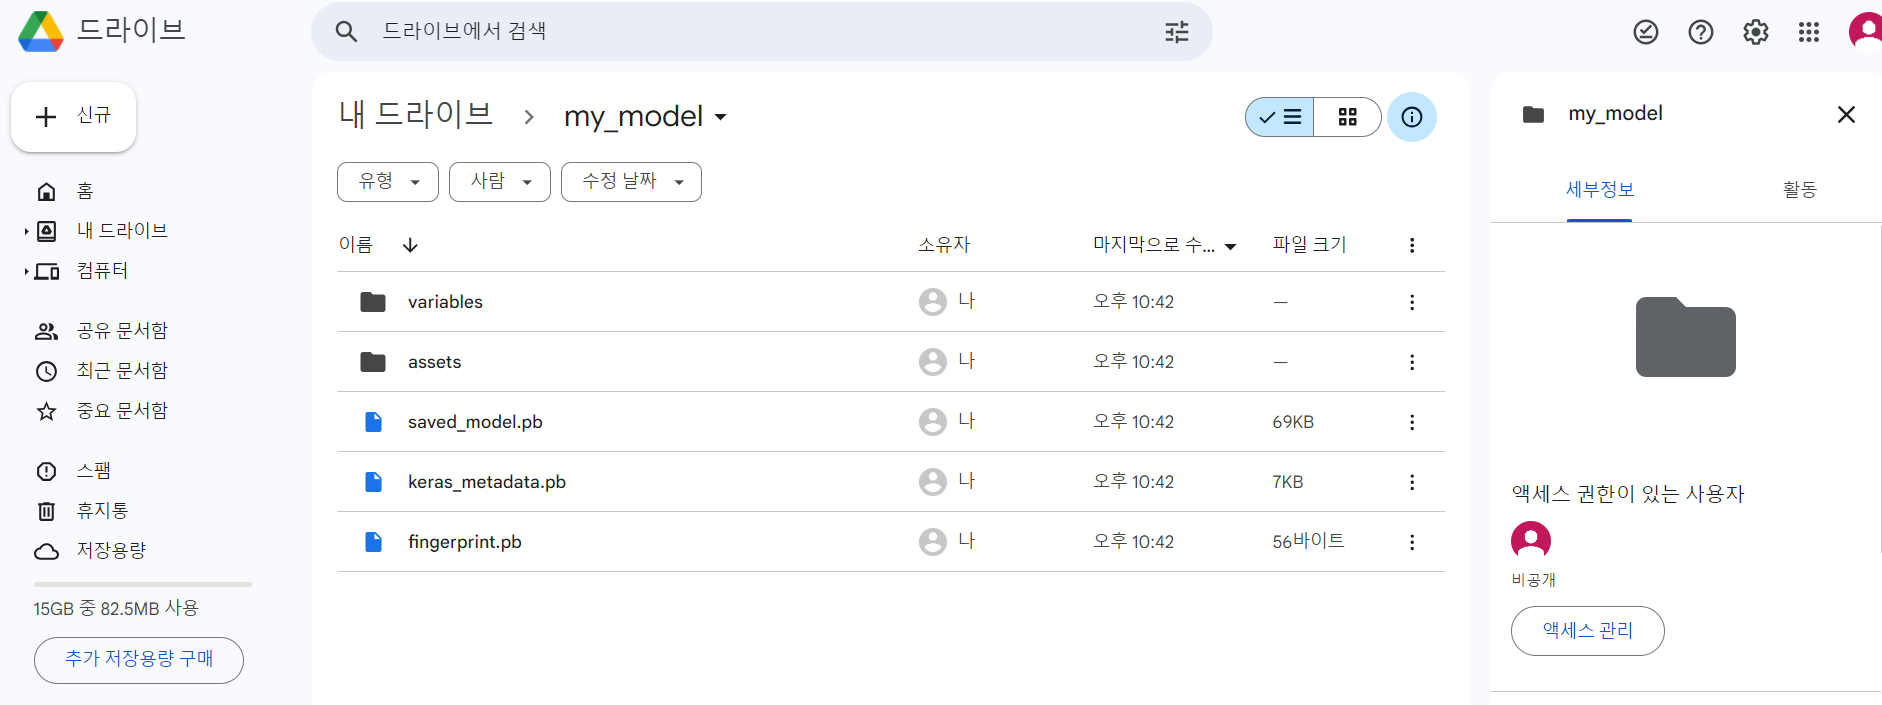

##4. 이미지 데이터 subplot에 그리기

이미지 데이터를 subplot에 그리기 위해

앞서 살펴 본 학습이 잘 된 경우 코드를 활용하였습니다.

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 8)                 6280      
                                                                 
 dense_28 (Dense)            (None, 10)                90        
                                                                 
Total params: 6370 (24.88 KB)
Trainable params: 6370 (24.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1200/1200 [==============================] - 6s 3ms/step - loss: 0.8209 - accuracy: 0.7067 - val_loss: 0.5723 - val_accuracy: 0.8024
Epoch 2/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.5377 - accuracy: 0.8129 - val_loss: 0.5410 - val_accuracy: 0.8075
Epoch 3/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.4994 - accuracy: 0.8265 - val_loss: 0.4834 - val_a

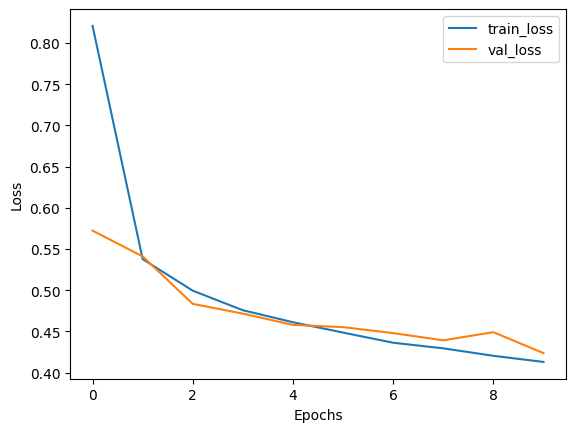

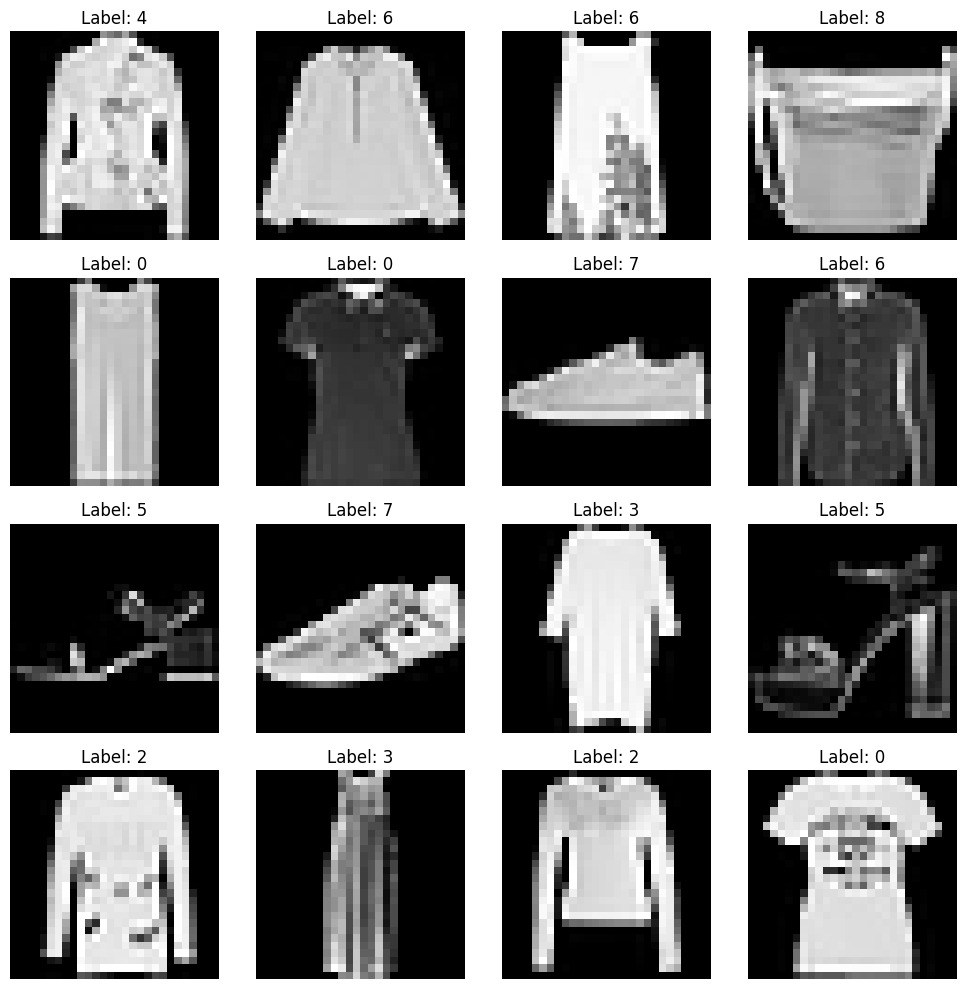

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# 데이터 전처리
X_train = X_train.reshape(-1, 28*28) / 255.0
X_test = X_test.reshape(-1, 28*28) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 모델 정의
model = Sequential([
    Dense(8, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# EarlyStopping 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# 모델 학습
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping, checkpoint])

# 학습 결과 시각화
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 이미지 무작위로 선택
random_indices = np.random.choice(range(len(X_test)), size=16, replace=False)
images = X_test[random_indices]
labels = np.argmax(y_test[random_indices], axis=1)

# 이미지 출력
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(zip(images, labels), 1):
    plt.subplot(4, 4, i)
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
plt.tight_layout()
plt.show()
